# Desenvolvimento Filtro Passa Baixa

Analisando o sinal, podemos ver que o ruído se encontra em torno de 8 kHz, mas para remover completamente ele e outros ruídos de fundo podemos simplesmente pegar a faixa de frequência da voz humana e multiplicar seu limite superior por uma constante para deixar passar algumas harmônicas.

Foi decidido então que a frequência de corte do filtro deve se encontrar em torno de 2 kHz, dado que a voz humana vai até ~250 Hz.

O filtro selecionado foi um elíptico IIR de ordem 10, devido a sua alta qualidade e baixo ripple.

In [9]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavf
import scipy.signal as sp

import pandas as pd
import numpy as np

import DSP

df = pd.read_csv("ab_PB.csv")
b  = np.array(df['b'])
a  = np.array(df['a'])

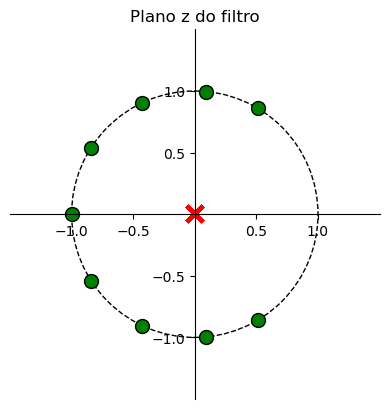

(array([ 0.51093166+0.85962134j,  0.51093166-0.85962134j,
         0.09151633+0.99580358j,  0.09151633-0.99580358j,
        -1.        +0.j        , -0.84163986+0.54003921j,
        -0.84163986-0.54003921j, -0.4259869 +0.90472933j,
        -0.4259869 -0.90472933j]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [10]:
DSP.zplane(b, a, title="Plano z do filtro")

In [11]:
[fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")
converted_signal    = raw_signal/(float(1<<16) - 1)     # Converte de int16 para float
filtered_signal     = sp.lfilter(b, a, converted_signal)
filtered_signal     = DSP.normalize(filtered_signal)

wavf.write("Sinais/fala_sem_tom_alta_freq.wav", fs, filtered_signal)

C:\Users\emanuel\AppData\Local\Temp\ipykernel_12284\3956514524.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")
